# PROJECT 2: DATA WRANGLING

For this project, i would use data gathered from 3 diffferent sources. The three different data used are;
1. twitter_archive_enhanced.csv. as provided in the question.
2. image_predictions.tsv also as provided in the project question
3. tweet_json.txt which is to be provided by the student by querying a twitter API

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import requests
import os

import tweepy 
from tweepy import OAuthHandler
import json
from timeit import default_timer as timer

## STEP 1: GATHERING DATA

### A- Twitter Archive Enhanced CSV 


In [2]:
#To read and display my first data

df=pd.read_csv("twitter-archive-enhanced.csv")
df.head()


,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [3]:
#To ascertain the file structure- we see that it has 2,356 rows and 17 columns.
df.shape

(2356, 17)

### B- Image Prediction TSV


Using request and OS library to gather this file.

In [4]:
#Using the requests library to download the tweet image prediction
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
reponse = requests.get(url)
with open("image_predictions.tsv", mode = 'wb') as file:
    file.write(reponse.content)

In [5]:
#To read and display the data 

df_image= pd.read_csv("image_predictions.tsv", sep = '\t')
df_image.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [6]:
#To ascertain the file structure. We can see it has 2075 rows amd 12 columns.

df_image.shape

(2075, 12)

### C- JSON Text

In [7]:

# the following confidential data has been replaced by generic strings

consumer_key = 'Y2VGELSqQmRlAAMVUJI1g0jlW'
consumer_secret = 'BrWhNCKqPSw8tqAqxdyy44h1BE1mMSVRwf8gxH6WYq96MIJYB7'
access_token = '4876230989-KxcZbTvZDkT2SPQwufBf9g1RwTSxsgG6poqUt6m'
access_secret = 'MGffdtaFM51kEwsQoIQZlwNS2A6OsoN2PEaW23w1ZbCBb'
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)
api = tweepy.API(auth, wait_on_rate_limit=True)

In [8]:
#To access the ddta needed that is not inluded in the raw data provided

failed_tweet = []
with open('tweet_json.txt', mode='w', encoding='utf-8') as file:
    for tweet_id in df['tweet_id']:
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            tweet_json = json.dumps(tweet._json)
            # write tweet JSON data line by line
            file.write(tweet_json + '\n')
        except:
            failed_tweet.append(tweet_id)

In [9]:
#To open a file new reading the data accessed line by line.
df_list = []
with open('tweet_json.txt', mode='r', encoding='utf-8') as file:
    lines = file.readlines()
    # read tweet JSON data line by line
    for line in lines:
        data = json.loads(line)
        tweet_id = data['id']
        retweet_count = data['retweet_count']
        favorite_count = data['favorite_count']
        df_list.append({'tweet_id': tweet_id, 'retweet_count': retweet_count, 'favorite_count': favorite_count})
tweet_data = pd.DataFrame(df_list, columns=['tweet_id', 'retweet_count', 'favorite_count'])

In [10]:
#To confirm that my code worked
tweet_data

,tweet_id,retweet_count,favorite_count
0,892420643555336193,6934,33219
1,892177421306343426,5239,28755
2,891815181378084864,3452,21624
3,891689557279858688,7147,36229
4,891327558926688256,7677,34659
...,...,...,...
2320,666049248165822465,36,88
2321,666044226329800704,114,246
2322,666033412701032449,36,99
2323,666029285002620928,39,111


All the date has been fully gathered and the structured,

#On to the Next step of Accessing the Data

## ASSESSING DATA

### In this section, i hope to highlight and display the 8 quality data isues and 2 tidiness issues as required by the project.



#### Quality issues are issues that affects the content of the cells of the dataframe
#### Tidiness issues are issues that affect the structure of the data

### Assessing and Displaying The Image Prediction Data

In [11]:
#Firstly, I will display the content of my image prediction.tsv  

df_image

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
...,...,...,...,...,...,...,...,...,...,...,...,...
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True


In [12]:
# We have 2075 rows and 12 columns

#To details of the cell in this dataframe.

df_image.info

<bound method DataFrame.info of                 tweet_id                                          jpg_url  \
0     666020888022790149  https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg   
1     666029285002620928  https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg   
2     666033412701032449  https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg   
3     666044226329800704  https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg   
4     666049248165822465  https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg   
...                  ...                                              ...   
2070  891327558926688256  https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg   
2071  891689557279858688  https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg   
2072  891815181378084864  https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg   
2073  892177421306343426  https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg   
2074  892420643555336193  https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg   

      img_num                      p1   p1_

 #### To check for null values.


In [13]:
df_image.isnull().sum()

#There are no null values in the image prediction tsv.

tweet_id    0
jpg_url     0
img_num     0
p1          0
p1_conf     0
p1_dog      0
p2          0
p2_conf     0
p2_dog      0
p3          0
p3_conf     0
p3_dog      0
dtype: int64

#### To check for duplicate

In [14]:
df_image.duplicated().sum()

#Output below shows that there are no duplicates within this dataframe.

0

### To Assess and Display Twitter Archives Data

In [15]:
df.head(5)

#To give a visual assessment of the data frame while in jupyter.

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [16]:
#To observe the data,

#Info helps with a conside summary of the daa
df.info

<bound method DataFrame.info of                 tweet_id  in_reply_to_status_id  in_reply_to_user_id  \
0     892420643555336193                    NaN                  NaN   
1     892177421306343426                    NaN                  NaN   
2     891815181378084864                    NaN                  NaN   
3     891689557279858688                    NaN                  NaN   
4     891327558926688256                    NaN                  NaN   
...                  ...                    ...                  ...   
2351  666049248165822465                    NaN                  NaN   
2352  666044226329800704                    NaN                  NaN   
2353  666033412701032449                    NaN                  NaN   
2354  666029285002620928                    NaN                  NaN   
2355  666020888022790149                    NaN                  NaN   

                      timestamp  \
0     2017-08-01 16:23:56 +0000   
1     2017-08-01 00:17:27 +0000  

In [17]:
#The output above revealed lot some data qulaity issue that would be ientified in my observation later

In [18]:
df.isnull().sum()

#We can observe that they are some null values in the twiiter rchive dataframe

tweet_id                         0
in_reply_to_status_id         2278
in_reply_to_user_id           2278
timestamp                        0
source                           0
text                             0
retweeted_status_id           2175
retweeted_status_user_id      2175
retweeted_status_timestamp    2175
expanded_urls                   59
rating_numerator                 0
rating_denominator               0
name                             0
doggo                            0
floofer                          0
pupper                           0
puppo                            0
dtype: int64

In [19]:
# To verify if the twitter dataframe has some duplicate value;

df.duplicated().sum()

0

### To Access and Display our JSON_File

In [20]:
#To display the headers
tweet_data

,tweet_id,retweet_count,favorite_count
0,892420643555336193,6934,33219
1,892177421306343426,5239,28755
2,891815181378084864,3452,21624
3,891689557279858688,7147,36229
4,891327558926688256,7677,34659
...,...,...,...
2320,666049248165822465,36,88
2321,666044226329800704,114,246
2322,666033412701032449,36,99
2323,666029285002620928,39,111


In [21]:
#Conscise summary of the file
tweet_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2325 entries, 0 to 2324
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   tweet_id        2325 non-null   int64
 1   retweet_count   2325 non-null   int64
 2   favorite_count  2325 non-null   int64
dtypes: int64(3)
memory usage: 54.6 KB


In [22]:
#Checking for duplicate

tweet_data.duplicated().sum()

0

### Listing Out All observation with regards Data Quality and Data Tidiness

### On Tidiness

1.In Df_new, Twitter Archive Enhanced CSV,  Columns doggo, flooder, pupper and puppo can be merged into one column.

2.The three datasets can be merged into one.

####  On Quality

##### 1. Unnecessay Retweet Rows& Columns such as retweeted_status_id	retweeted_status_user_id	retweeted_status_timestamp

##### 2.Unnecessary in reply to rows&columns such as in_reply_to_status_id	in_reply_to_user_id
##### The two above are in line with the project criteria of original ratings only.

##### 3. In the names colmuns, some dogs without names, but given names of "a" or "an" instead of None

##### 4. Wrong Datatype om Tweet Timestamp.

##### 5 Some rating denominators are more than 10. Project says numerator can be more than 10 due to its unique nature,
##### However it does  not qualify same for the denominator.

##### 6.Many predictions contains 3 false in df_image, which means those are useless prediction data.

##### 7.  Some unnecessary columns such as expanded_urls and img_num

##### 8.The datatype of the "tweet_id" column is integer and should be object.

### Cleaning the Data

In [23]:
#To create a copy of all files

df_new = df.copy()
df_image_new = df_image.copy()
tweet_data_new = tweet_data.copy()

### On Tidiness

In [24]:
#In twitter_archive, Columns doggo, flooder, pupper and puppo can be merged into one column.
#To verify the code.
df_new['stage']=None
df_new['stage']= df_new[['doggo', 'floofer', 'pupper', 'puppo']].max(axis=1)
df_new.head(2)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,stage
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None,None


In [25]:
# Convert the column stage data type into 'category' type

df_new.stage = df_new.stage.astype('category')

In [26]:
# Delete doggo, floofer, pupper and puppo columns

df_new.drop(['doggo', 'floofer', 'pupper', 'puppo'], axis=1, inplace=True)

In [27]:
#To confirm the code above

df_new.head(2)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,stage
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None


### 2.The three datasets can be merged into one.

In [28]:
#To merge all files

df_new=pd.merge(df_new, df_image_new, how = 'left', on = ['tweet_id'] )
df_new = pd.merge(df_new, tweet_data, how = 'left', on = ['tweet_id'])

In [29]:
#To verify if the merging worked
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2356 entries, 0 to 2355
Data columns (total 27 columns):
 #   Column                      Non-Null Count  Dtype   
---  ------                      --------------  -----   
 0   tweet_id                    2356 non-null   int64   
 1   in_reply_to_status_id       78 non-null     float64 
 2   in_reply_to_user_id         78 non-null     float64 
 3   timestamp                   2356 non-null   object  
 4   source                      2356 non-null   object  
 5   text                        2356 non-null   object  
 6   retweeted_status_id         181 non-null    float64 
 7   retweeted_status_user_id    181 non-null    float64 
 8   retweeted_status_timestamp  181 non-null    object  
 9   expanded_urls               2297 non-null   object  
 10  rating_numerator            2356 non-null   int64   
 11  rating_denominator          2356 non-null   int64   
 12  name                        2356 non-null   object  
 13  stage             

In [30]:
df_new.shape

(2356, 27)

We can see from above my code was successful.

### On Quality Issues

#### 1. Unnecessay Retweet Rows& Columns such as retweeted_status_id	retweeted_status_user_id	retweeted_status_timestamp.


In [31]:
#First, I will retrieve the retwwets lines I want to delete and without NaN in retweeted_status_user_id
retweetslines = (~df_new.retweeted_status_id.isnull())  


In [32]:
#Check how many retweets we have
retweetslines.sum()

181

In [33]:
#Delete Retweets
df_new = df_new[~retweetslines]

In [34]:
#Delete useless retweets columns
df_new.drop(['retweeted_status_id',
                     'retweeted_status_user_id', 
                    'retweeted_status_timestamp'], axis=1, inplace=True)

#### Confirm

In [35]:
#To check if it worked.


df_new.shape

(2175, 24)

#### 2.Unnecessary in reply to rows&columns such as in_reply_to_status_id	in_reply_to_user_id

In [36]:
#To create a list of of lines i.e "reply" to be deleted

replys_index = list(df_new[df_new["in_reply_to_status_id"].isnull()==False].index)

df_new.drop(axis=0, index=replys_index, inplace=True)

In [37]:
df_new.drop(['in_reply_to_user_id', 
                       'in_reply_to_status_id'],
                      axis=1,
                      inplace=True)

#### Confirm

In [38]:
#To check if it worked.


df_new.shape

(2097, 22)

###  3.In the names colmuns, some dogs without names, but given names of "a" or "an" instead of None

In [39]:
# To replace value a, and an, in names column with none.

df_new['name'].replace({"a":"none","an":"none"},inplace=True)

### 4. Wrong Datatype om Tweet Timestamp.

In [40]:
#The data type for Time should be in Datatime format,
#This is very critical to ensure
#the timestamp column is not corrupted.

#Validated in the output below.


df_new.timestamp = df_new.timestamp.astype('datetime64')
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 22 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   tweet_id            2097 non-null   int64         
 1   timestamp           2097 non-null   datetime64[ns]
 2   source              2097 non-null   object        
 3   text                2097 non-null   object        
 4   expanded_urls       2094 non-null   object        
 5   rating_numerator    2097 non-null   int64         
 6   rating_denominator  2097 non-null   int64         
 7   name                2097 non-null   object        
 8   stage               2097 non-null   category      
 9   jpg_url             1971 non-null   object        
 10  img_num             1971 non-null   float64       
 11  p1                  1971 non-null   object        
 12  p1_conf             1971 non-null   float64       
 13  p1_dog              1971 non-null   object      

### 5 Some rating denominators are more than 10. Project says numerator can be more than 10 due to its unique nature, However it does  not qualify same for the denominator.

In [41]:
#To group the list of denominator not equal to 10.
#To delete rows that the denominator is not equal to 10.

not_ten = list(df_new.query("rating_denominator != 10").index)
df_new.drop(index=not_ten, inplace=True)

In [42]:
# To Validate if the code worked to delete ratin_denominator not equal to 10
df_new.query("rating_denominator != 10").index

#The Code was successful.

Int64Index([], dtype='int64')

### 6.many predictions contains 3 false in df_image, which means those are useless prediction data.

In [43]:
#To group all false ind Df_image to a df
#To drop all false in the data as they are useless

false_Dogs = list(df_image.query("p1_dog==False and p2_dog==False and p3_dog == False").index)
df_image.drop(index=false_Dogs,inplace=True)

### 7.  To remove unnecessary columns such as expanded_urls and img_num

In [44]:
#Io remove img_num and expanded_urls
df_new.drop(['img_num', 'expanded_urls'], axis=1, inplace = True)

In [45]:
# To validate it worked
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2080 entries, 0 to 2355
Data columns (total 20 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   tweet_id            2080 non-null   int64         
 1   timestamp           2080 non-null   datetime64[ns]
 2   source              2080 non-null   object        
 3   text                2080 non-null   object        
 4   rating_numerator    2080 non-null   int64         
 5   rating_denominator  2080 non-null   int64         
 6   name                2080 non-null   object        
 7   stage               2080 non-null   category      
 8   jpg_url             1954 non-null   object        
 9   p1                  1954 non-null   object        
 10  p1_conf             1954 non-null   float64       
 11  p1_dog              1954 non-null   object        
 12  p2                  1954 non-null   object        
 13  p2_conf             1954 non-null   float64     

### 8.The datatype of the "tweet_id" column is integer and should be object.


In [46]:
#To convert Tweet_id to Object
#To verify

df_new.tweet_id = df_new.tweet_id.astype('object')
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2080 entries, 0 to 2355
Data columns (total 20 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   tweet_id            2080 non-null   object        
 1   timestamp           2080 non-null   datetime64[ns]
 2   source              2080 non-null   object        
 3   text                2080 non-null   object        
 4   rating_numerator    2080 non-null   int64         
 5   rating_denominator  2080 non-null   int64         
 6   name                2080 non-null   object        
 7   stage               2080 non-null   category      
 8   jpg_url             1954 non-null   object        
 9   p1                  1954 non-null   object        
 10  p1_conf             1954 non-null   float64       
 11  p1_dog              1954 non-null   object        
 12  p2                  1954 non-null   object        
 13  p2_conf             1954 non-null   float64     

In [47]:
df_new.head()

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,name,stage,jpg_url,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,retweet_count,favorite_count
0,892420643555336193,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,13,10,Phineas,None,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False,6934.0,33219.0
1,892177421306343426,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,13,10,Tilly,None,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True,5239.0,28755.0
2,891815181378084864,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,12,10,Archie,None,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True,3452.0,21624.0
3,891689557279858688,2017-07-30 15:58:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,13,10,Darla,None,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False,7147.0,36229.0
4,891327558926688256,2017-07-29 16:00:24,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,12,10,Franklin,None,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True,7677.0,34659.0


In [48]:
df_new.describe()

,rating_numerator,rating_denominator,p1_conf,p2_conf,p3_conf,retweet_count,favorite_count
count,2080.000000,2080.0,1954.000000,1.954000e+03,1.954000e+03,2072.000000,2072.000000
mean,11.698077,10.0,0.594065,1.348960e-01,6.010819e-02,2279.353764,7651.650579
std,39.816875,0.0,0.272336,1.011622e-01,5.080867e-02,3996.338175,11146.199840
min,0.000000,10.0,0.044333,1.011300e-08,1.740170e-10,11.000000,64.000000
25%,10.000000,10.0,0.362656,5.361625e-02,1.598680e-02,503.250000,1681.000000
50%,11.000000,10.0,0.587440,1.175870e-01,4.947920e-02,1099.000000,3486.500000
75%,12.000000,10.0,0.846897,1.962177e-01,9.155483e-02,2601.250000,9545.750000
max,1776.000000,10.0,1.000000,4.880140e-01,2.710420e-01,69898.000000,142839.000000


### Storing the Data

Save gathered, assessed, and cleaned master dataset to a CSV file named "twitter_archive_master.csv".

In [49]:
df_new.to_csv('twitter_archive_master.csv', encoding = 'utf-8', index =False)

### Analyzing and Visualizing Data

####  In this section, I will analyze and visualize my wrangled data. I must produce at least three (3) insights and one (1) visualization.

### 1. What is the most popular dog name?
### 2.  Which dog stage do we have the most?
### 3.  Where are the primary source of the data From?


In [50]:
Twitter_archive_master=pd.read_csv("Twitter_archive_master.csv")
Twitter_archive_master.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2080 entries, 0 to 2079
Data columns (total 20 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   tweet_id            2080 non-null   int64  
 1   timestamp           2080 non-null   object 
 2   source              2080 non-null   object 
 3   text                2080 non-null   object 
 4   rating_numerator    2080 non-null   int64  
 5   rating_denominator  2080 non-null   int64  
 6   name                2080 non-null   object 
 7   stage               2080 non-null   object 
 8   jpg_url             1954 non-null   object 
 9   p1                  1954 non-null   object 
 10  p1_conf             1954 non-null   float64
 11  p1_dog              1954 non-null   object 
 12  p2                  1954 non-null   object 
 13  p2_conf             1954 non-null   float64
 14  p2_dog              1954 non-null   object 
 15  p3                  1954 non-null   object 
 16  p3_con

In [51]:
Twitter_archive_master.head(2)

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,name,stage,jpg_url,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,retweet_count,favorite_count
0,892420643555336193,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,13,10,Phineas,None,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False,6934.0,33219.0
1,892177421306343426,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,13,10,Tilly,None,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True,5239.0,28755.0


In [52]:
Twitter_archive_master.describe()

,tweet_id,rating_numerator,rating_denominator,p1_conf,p2_conf,p3_conf,retweet_count,favorite_count
count,2.080000e+03,2080.000000,2080.0,1954.000000,1.954000e+03,1.954000e+03,2072.000000,2072.000000
mean,7.367027e+17,11.698077,10.0,0.594065,1.348960e-01,6.010819e-02,2279.353764,7651.650579
std,6.724699e+16,39.816875,0.0,0.272336,1.011622e-01,5.080867e-02,3996.338175,11146.199840
min,6.660209e+17,0.000000,10.0,0.044333,1.011300e-08,1.740170e-10,11.000000,64.000000
25%,6.767367e+17,10.000000,10.0,0.362656,5.361625e-02,1.598680e-02,503.250000,1681.000000
50%,7.097095e+17,11.000000,10.0,0.587440,1.175870e-01,4.947920e-02,1099.000000,3486.500000
75%,7.880674e+17,12.000000,10.0,0.846897,1.962177e-01,9.155483e-02,2601.250000,9545.750000
max,8.924206e+17,1776.000000,10.0,1.000000,4.880140e-01,2.710420e-01,69898.000000,142839.000000


#### 1. What is the most popular dog name?

In [53]:
#To confirm the post popular name in programmatically.

popular_name = Twitter_archive_master.name.value_counts()
popular_name = popular_name.head(10)
popular_name

None       592
none        59
Lucy        11
Charlie     11
Oliver      10
Cooper      10
Tucker       9
Penny        9
Sadie        8
the          8
Name: name, dtype: int64

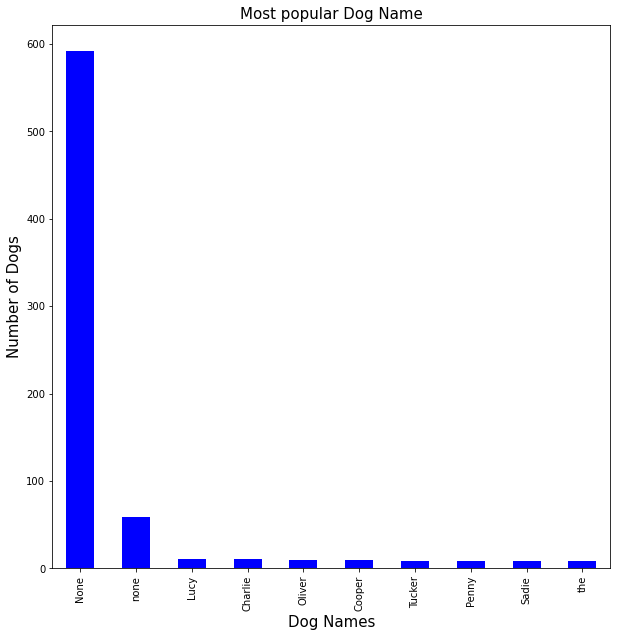

In [54]:
#To Visualize the most popular dog name.
# I used the bar chart as my visualization model.

popular_name.plot(kind='bar', figsize=(10,10), color = 'blue')  

plt.title('Most popular Dog Name', fontsize=15)  
plt.xlabel('Dog Names', fontsize=15)               
plt.ylabel('Number of Dogs', fontsize=15);

####  Aside none, the most popular names in this dataframe are Lucy and Charlie

#### 2. What dog stage do we have the most?

In [55]:
Stage= Twitter_archive_master['stage'].value_counts()
Stage.info

<bound method Series.info of None       1744
pupper      230
doggo        72
puppo        24
floofer      10
Name: stage, dtype: int64>

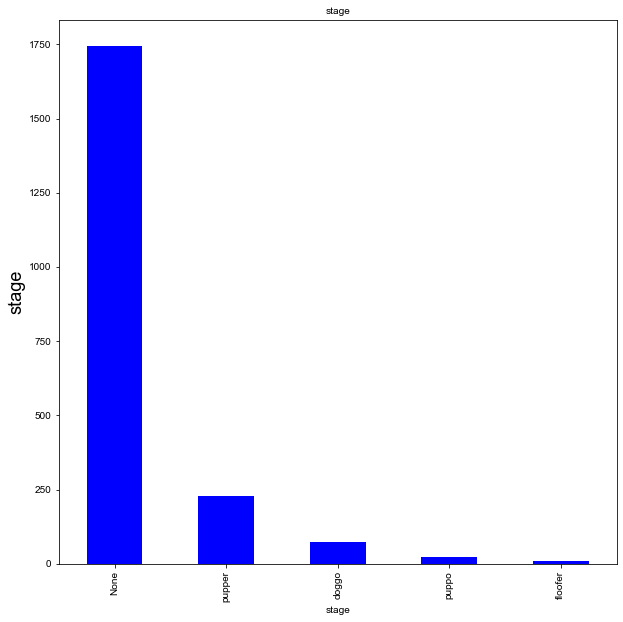

In [56]:
#To visulaize dog stages in a bar char

Stage.plot(kind='bar', figsize=(10,10), color = 'blue')
plt.title("stage",fontsize=10)
plt.xlabel('stage',fontsize=10)
plt.ylabel("stage",fontsize= 18)
sns.set_style("whitegrid")

#### Asides none, the most common dog stage is the pupper

### 3. Where are the primary source of the data From?

In [57]:
#Determine the source of tweets
Twitter_archive_master['source'].value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     1947
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          91
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       31
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source, dtype: int64

### The primary source of the tweet are from Twitter for iphone

#### THIS IS THE END OF MY DATA WRANGLING.